In [1]:
import keras
from keras.datasets import mnist
import tensorflow as tf
#ValueError: Creating variables on a non-first call to a function decorated with tf.function. ERRO OCORRIDO NA EXECUÇÃO
#DO MODELO.FIT
#tf.config.run_functions_eagerly(True) #linha de comando encontrada num forum da internet para solucionar a utilizaçao 
#tf.data.experimental.enable_debug_mode() #linhas de comando sugerida pelo proprio Jupyter durante a execução do modelo
#Após carregar o modelo.fit na variavel historico, o erro acima nao apareceu mais!

In [2]:
(xtreino,ytreino),(xteste,yteste)=mnist.load_data()

In [3]:
#xtreino

In [4]:
import pandas as pd
pd.set_option('display.max_columns',784)
#xtreinodf=pd.DataFrame(xtreino)
#ValueError: Must pass 2-d input. shape=(60000, 28, 28)

In [5]:
xtreino.shape

(60000, 28, 28)

In [6]:
xteste.shape

(10000, 28, 28)

In [7]:
xtreinoremodelado=xtreino.reshape((60000,784))
xtesteremodelado=xteste.reshape((10000,784))

In [8]:
#xtreinoremodelado

In [9]:
xtreinoremodelado.shape

(60000, 784)

In [10]:
xtesteremodelado.shape

(10000, 784)

In [11]:
xtreinoremodeladodf=pd.DataFrame(xtreinoremodelado)
xtesteremodeladodf=pd.DataFrame(xtesteremodelado)

In [12]:
#xtreinoremodeladodf

In [13]:
#xtreinoremodelado[0]

In [14]:
#xtreinoremodeladodf.describe()

In [15]:
xtreinoremodeladodf.values.max()

255

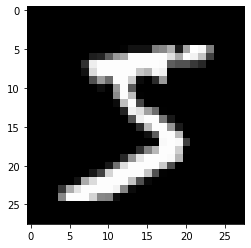

In [16]:
import matplotlib.pyplot as plt
plt.imshow(xtreino[0],cmap='gray')

In [17]:
#import matplotlib.pyplot as plt
#plt.imshow(xtreinoremodeladodf[1],cmap='gray')
#TypeError: Invalid shape (60000,) for image data

In [18]:
type(xtreinoremodeladodf)

pandas.core.frame.DataFrame

In [19]:
#Normalização dos dados
xtreinoremodeladodfnorm=xtreinoremodeladodf.astype('float32')/255
xtesteremodeladodfnorm=xtesteremodeladodf.astype('float32')/255

In [20]:
#xtreinoremodeladodfnorm.describe()

In [21]:
ytreino

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [22]:
ytreinoS=pd.Series(ytreino)
#ytreino.values.count()

In [23]:
type(ytreinoS)

pandas.core.series.Series

In [24]:
ytreinoS.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [93]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.optimizers import Adadelta
from keras.optimizers import Nadam
from keras.optimizers import Adagrad
from keras.optimizers import RMSprop
from keras.layers import Dropout
from keras.layers import ActivityRegularization
from keras import regularizers #Linha de comando utilizada pelo Natanael

In [108]:
#Criaçao da rede neural
modelo=Sequential()
modelo.add(Dense(30, input_dim=784, kernel_initializer='normal', activation='relu',kernel_regularizer=regularizers.l2(0.01)))
                 #,activity_regularizer='l2'))
#modelo.add(Dropout(0.05))
modelo.add(Dense(30, kernel_initializer='normal', activation='relu'))
#, kernel_regularizer='l2'))
modelo.add(Dense(10, kernel_initializer='normal', activation='softmax'))
#Utilizar regularização nas camadas para evitar overfitting dos dados de treino
#Para utilizar o Dropout é necessario carregar a biblioteca Dropout from keras.layers
#Usando o RMSprop com o Dropout de 0.05 nao ocorreu overfitting
#kernel_regularizer funcionou melhor que o activity_regularizer... Essas opçoes sao obtidas utilizando-se a tecla TAB
#dentro do modelo.add

In [109]:
otimiza=RMSprop()
#SGD com momentum=0.9 atinge valores altos de acuracia
#Para otimizador Adadelta, utilizar o learning_rate=1.0
#Para otimizador Adagrad, utilizar o learning_rate=0.5. Nao testei muitos valores...

In [110]:
modelo.compile(loss='categorical_crossentropy', optimizer=otimiza, metrics=['acc'])

In [111]:
#one hot enconding para a variavel de saida (target)
from keras.utils import np_utils
ytreinoconvert=np_utils.to_categorical(ytreino)
ytesteconvert=np_utils.to_categorical(yteste)

In [112]:
ytreinoconvert.shape

(60000, 10)

In [113]:
historico=modelo.fit(xtreinoremodeladodfnorm, ytreinoconvert, epochs=10, batch_size=200, 
           validation_data=(xtesteremodeladodfnorm, ytesteconvert),
          verbose=1)

Epoch 1/10
300/300 [==============================] - 1s 3ms/step - loss: 1.1850 - acc: 0.7316 - val_loss: 0.6465 - val_acc: 0.8725
Epoch 2/10
300/300 [==============================] - 1s 2ms/step - loss: 0.5726 - acc: 0.8799 - val_loss: 0.4882 - val_acc: 0.8955
Epoch 3/10
300/300 [==============================] - 1s 2ms/step - loss: 0.4638 - acc: 0.8982 - val_loss: 0.4220 - val_acc: 0.9029
Epoch 4/10
300/300 [==============================] - 1s 2ms/step - loss: 0.4007 - acc: 0.9114 - val_loss: 0.3626 - val_acc: 0.9192
Epoch 5/10
300/300 [==============================] - 1s 2ms/step - loss: 0.3549 - acc: 0.9229 - val_loss: 0.3609 - val_acc: 0.9207
Epoch 6/10
300/300 [==============================] - 1s 2ms/step - loss: 0.3194 - acc: 0.9316 - val_loss: 0.2853 - val_acc: 0.9399
Epoch 7/10
300/300 [==============================] - 1s 2ms/step - loss: 0.2930 - acc: 0.9380 - val_loss: 0.2744 - val_acc: 0.9404
Epoch 8/10
300/300 [==============================] - 1s 2ms/step - loss: 0.

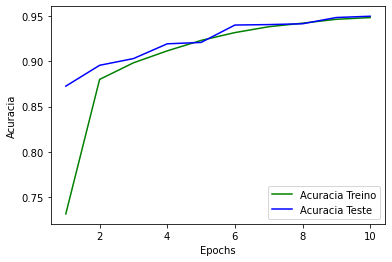

In [114]:
acuraciatreino=historico.history['acc']
acuraciateste=historico.history['val_acc']
epocas=range(1,len(acuraciateste)+1) #+1 para começar do 1 e nao do 0
plt.plot(epocas, acuraciatreino, '-g', label='Acuracia Treino')
plt.plot(epocas, acuraciateste, '-b', label='Acuracia Teste')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Acuracia')
plt.show() #Linha de comando opcional
#Comnparaçao da acuracia dos dados de treino x dados de teste é importante para verificar se esta ocorrendo oferfitting nos
#dados de treino